In [1]:
## Nombre : German Daniel Rojas
## 
## Universidad Sergio Arboleda
## Programacion Cientifica 

In [ ]:
## Se Cargan la bibliotecas correspondientes 

In [84]:
import pandas as pd 
import seaborn as sns
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [4]:
## Exploracio y preparacion del conjunto de datos

In [65]:
df = pd.read_csv('data03.csv', sep=';')
df.head()            ## Lectura del dataset correspondiente 

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [66]:
df.tail()

,EXAM1,EXAM2,EXAM3,FINAL
98,74,83,89,161
99,99,75,79,159
100,95,75,75,157
101,72,95,74,158
102,84,80,82,204


In [67]:
## Tamaño Filas  y columnas (features)
df.shape

(103, 4)

In [68]:
print(df.info())  ## Visualizacion inicial de los datos en el datset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   EXAM1   103 non-null    object
 1   EXAM2   103 non-null    object
 2   EXAM3   103 non-null    object
 3   FINAL   103 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.3+ KB
None


In [69]:

df = df.applymap(lambda x: np.nan if x == ' ' else x) ##Remplazo los valores vacios por NAN, para su posteriror elminiacion

In [71]:
df.iloc[96] ## Ejemplo de un registro defectuoso en el dataset 

EXAM1     74
EXAM2     80
EXAM3    NaN
FINAL    190
Name: 96, dtype: object

In [72]:
df = df.dropna() ## Elimino  los registros posean en sus features, datos NAN

In [74]:
df.tail(10)

,EXAM1,EXAM2,EXAM3,FINAL
92,87,72,71,139
93,61,57,80,225
94,81,75,71,148
95,77,76,99,189
97,72,77,73,193
98,74,83,89,161
99,99,75,79,159
100,95,75,75,157
101,72,95,74,158
102,84,80,82,204


In [76]:
df.shape ## numero de resgistros que quedan despues de eliminar registros nan

(94, 4)

In [81]:
## Conversion de los datos a datos numericos- para un manejo mas optimo por las herramientas y recursos de computo
df =df.astype('int64')

In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 102
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   EXAM1   94 non-null     int64
 1   EXAM2   94 non-null     int64
 2   EXAM3   94 non-null     int64
 3   FINAL   94 non-null     int64
dtypes: int64(4)
memory usage: 3.7 KB
None


In [89]:
df.describe().T ## Resumen estadistico del dataset 

,count,mean,std,min,25%,50%,75%,max
EXAM1,94.0,79.510638,11.995290,45.0,72.25,80.0,87.0,107.0
EXAM2,94.0,78.191489,11.353818,46.0,70.25,78.0,87.0,103.0
EXAM3,94.0,79.702128,11.785566,49.0,73.00,78.0,90.0,106.0
FINAL,94.0,158.893617,26.689964,97.0,142.25,157.5,177.0,227.0


In [101]:
df_limpio = copy.copy(df)
df_limpio

,EXAM1,EXAM2,EXAM3,FINAL
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
...,...,...,...,...
98,74,83,89,161
99,99,75,79,159
100,95,75,75,157
101,72,95,74,158


In [ ]:
##Conslusiones de limpieza de datos y exploracion:
## Dado que el problema es de examenes, elimine aquellos registros que estaban vacios, por la siguientes razones:
## Si remplazo por 0 lo hago menos logico y lineal con la  relacion del examen Final, esto quiere decir que añado ruido a la hora de predecir un resultado
## Por lo tanto es mejor eliminar registros invariables con datos vacios que añadir ruido de comportamiento del estudio, haciendo mas predecible el comportamiento del la varable de target posteriormente

In [90]:
## 3.- Visualización de los Datos (Selección de Variables Independientes $features$)

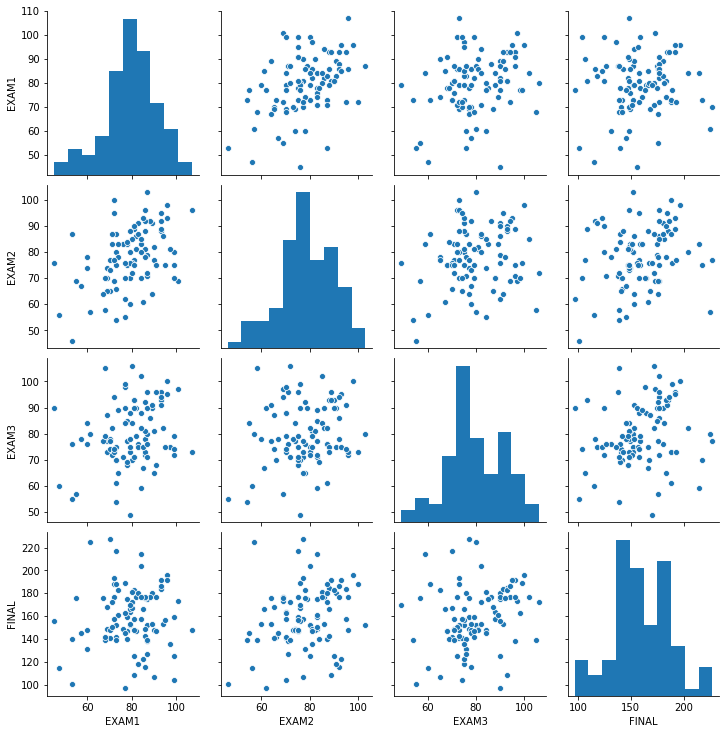

In [92]:
sns.pairplot(df_limpio) ##Grafico de dipersion y relacion por variables

In [93]:
## Conlusion del Grafico de  dispersion y variabilidad:

## Se puede observar que los datos estan completamente distribuidos, pero no tienen mucha relacion lineal
## Se observa que ningun examen tiene un comportamiento lineal entre si, esto demuestra que los valores de un examen no son influidos por otro
## Aunque, datalladamente a ojo se puede establcer que si hay una linealidad en aquellas muestras que matienen una nota promedio 50 - 90


In [95]:
matrixCorrelacion = df.corr()
matrixCorrelacion

,EXAM1,EXAM2,EXAM3,FINAL
EXAM1,1.000000,0.417089,0.256192,0.059451
EXAM2,0.417089,1.000000,0.167493,0.232059
EXAM3,0.256192,0.167493,1.000000,0.211256
FINAL,0.059451,0.232059,0.211256,1.000000


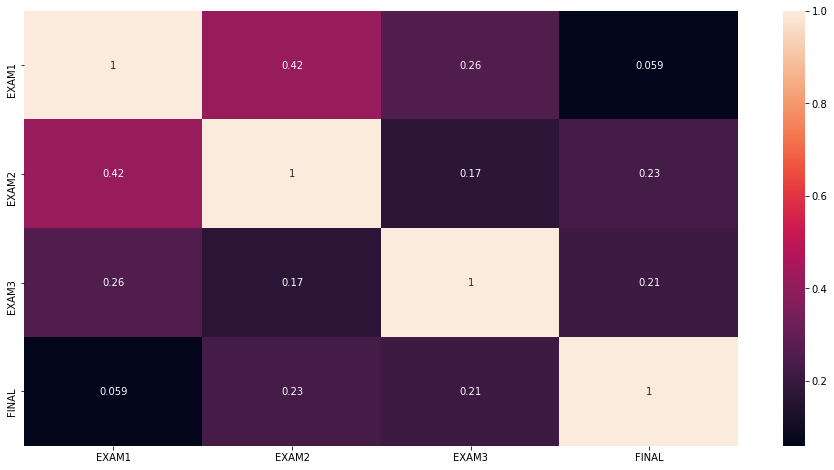

In [97]:
fig, ax = plt.subplots(figsize = (16,8))
sns.heatmap(matrixCorrelacion, annot = True)

In [98]:
## Conlusiones grafico de correlacion:
## Se observan como las variables poseen una correlacion muy baja, puede llevar a que el modelo prediga un resultado desviado de la rrealidad
## Las dos variables mas influyentes para el target (Examen Final), respecto a su correlacion son : EXAMEN 2, EXAMEN 3
## Entre los examenes existe una correlacion medianamente, con tendecia a la  baja  de comportamiento y relacion entre si


In [99]:
##Sección de funciones - Estas permiten un estudio automatizado de relacion lineal del dataset que se escoja

In [102]:
def relacionFeature(corrdata, umbral):
    feature= []
    valor  = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > umbral:
            feature.append(index)
            valor.append(corrdata[index])
            
    df = pd.DataFrame(data = valor, index = feature, columns=['Valor de Correlación'])
    return df

total_features = []
total_nombre_features = []
valor_correlacion_sel = []
r2_valores = []
mae_valores = []
mse_valores =[]

def metricas_rendimiento(features, umb, y_true, y_pred):
    puntuacion = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features.columns)-1)
    total_nombre_features.append(features.columns.tolist())
    valor_correlacion_sel.append(umb)
    r2_valores.append(puntuacion)
    mae_valores.append(mae)
    mse_valores.append(mse)
    
    df_metricas = pd.DataFrame(data=[total_nombre_features,total_features,valor_correlacion_sel, 
                                     r2_valores, mae_valores, mse_valores  ]
                                  , index = ['Nombre $Features$', '# $Features$', 'valCorr', 'r2_score', 'MAE', 'MSE'])
    return df_metricas.T

def obten_y_predict(data_Corr):
    X = data_Corr.drop(labels= ['Adj Close'], axis=1)
    y = data_Corr['Adj Close']
    
    X_train, X_test, y_train, t_test = train_test_split(X,y, test_size=0.2, random_state=0)
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    y_predict = modelo.predict(X_test)
    
    return y_predict

In [103]:
## Se realiza los modelos lineales y su estudio

In [105]:
# Se fija el primer umbral de 20%,  este valor escojido  y basado en la matriz de correlacion de los examenes que pueden influir en el mejor modelo
## basado en su relacion con el Target
umbral = 0.2
valorCorrelacion = relacionFeature(matrixCorrelacion['FINAL'], umbral)
valorCorrelacion

,Valor de Correlación
EXAM2,0.232059
EXAM3,0.211256
FINAL,1.000000


In [107]:
#DataFrame con valores de umbral 20% de correlación
df_umbral_20 = df[valorCorrelacion.index]

X = df_umbral_20.drop('FINAL', axis=1)
y = df_umbral_20['FINAL']

### División Valores en bloques de Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
# Selección a modelo lineal
modelo = LinearRegression()
# Entrenar el model0
modelo.fit(x_train, y_train)

y_pred_train   = modelo.predict(x_train)
y_predict  = modelo.predict(x_test)

In [112]:
print("Los coeficientes del modelo son: ", modelo.coef_)
print("El punto de Inteseccion es : ",modelo.intercept_)
print("Formula del modelo es : Y = {}*(x1) + {}*x2 + {} ".format(modelo.coef_[0],modelo.coef_[1],modelo.intercept_))

Los coeficientes del modelo son:  [0.52742064 0.23819936]
El punto de Inteseccion es :  99.02712763639416
Formula del modelo es : Y = 0.5274206372186651*(x1) + 0.23819935784820156*x2 + 99.02712763639416 


In [113]:
# dataCorrAcept de arriba (dataframe con los features del umbral aceptado o buscado)
metricas_rendimiento(df_umbral_20, umbral, y_test, y_predict)

,Nombre $Features$,# $Features$,valCorr,r2_score,MAE,MSE
0,"[EXAM2, EXAM3, FINAL]",2,0.2,0.169496,15.7354,378.609


In [115]:
# Diferencia entre 'Predicted' y valor actual
dfPredict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
dfPredict.tail()

,Actual,Predicted
102,204,160.753126
62,118,164.887357
8,175,162.131300
23,149,159.715195
78,177,161.450814


In [116]:
## Conclusiones de Metricas con un umbral del 20%:
# se observa que r2 es score es demasiado bajo, esto quiere decir que el modelo no establece de forma correcta una prediccion 
# Los MSE  Y MAE, tiene un grado alto de valor, reflejando  y reapldando la conclusion anterior
# demuestra que con el valor de  los datos del EXAMEN 2 Y EXAMEN 3 no pueden establecer una prediccion de EXAMEN FINAL estable

In [118]:
predictiones = modelo.predict(X)


Text(0.5, 1.0, 'Residual Plot')

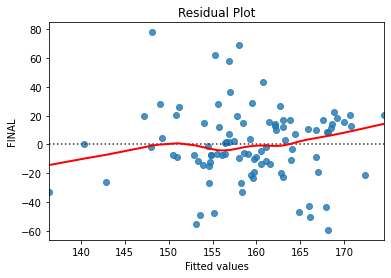

In [128]:
### Grafico de residuos frente a los valores ajustados
sns.residplot(predictiones.reshape(-1), 'FINAL', data=df_umbral_20, lowess=True, 
             line_kws={'color':'red','lw':2, 'alpha':1})
plt.xlabel('Fitted values')
plt.title('Residual Plot')

In [ ]:
## Conclusion  Grafico de residuos frente a los valores ajustados:
# Se demostro la conclusion de la primera parte, que describe como hay un puntajes que respetan un comportamiento leve de linealidad.
# Pero igualmente hay datos que no tiene un comportamiento estable, esto quiere decir que hay casos donde los Examenes previos al final no influyen en el valor de este ()

In [125]:
### Grafico QQ 
## Este gráfico muestra si los residuos (errores) se distribuyen normalmente o no. 
## Si los puntos se encuentran cerca de la línea normal (Diagonal), 
## se supone que los residuos se distribuyen normalmente.

residuales = df_umbral_20['FINAL'] - predictiones.reshape(-1)
residuales

0      -7.085730
1      17.407316
2      11.539652
3      21.465714
4      -8.510845
         ...    
98     -3.002783
99      1.598575
100     0.551373
101    -8.758841
102    43.246874
Name: FINAL, Length: 94, dtype: float64

Text(0.5, 1.0, 'Normal Q-Q Plot')

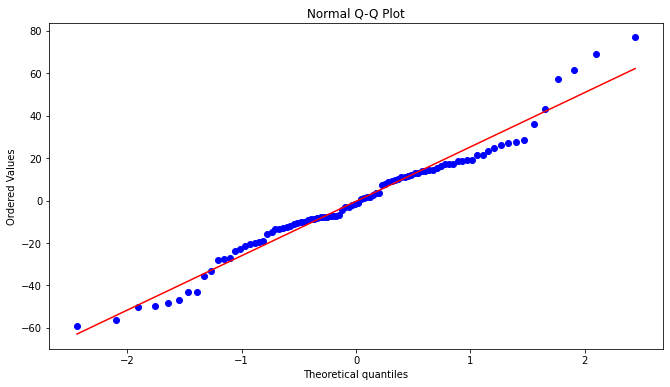

In [127]:
plt.figure(figsize=(11,6))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

In [129]:
## Conclusion grafi Q-Q:
## Se observa que los dostos si se distribuyen normalmente 

In [140]:
# Se fija el primer umbral de 4%,  este valor escojido  y basado en la matriz de correlacion de los examenes que pueden influir en el mejor modelo
## basado en su relacion con el Target, esto para incluir el Examen 1 que es el que menos tiene correlacion
umbral2 = 0.04
valorCorrelacion2 = relacionFeature(matrixCorrelacion['FINAL'], umbral2)
valorCorrelacion2

,Valor de Correlación
EXAM1,0.059451
EXAM2,0.232059
EXAM3,0.211256
FINAL,1.000000


In [141]:
#DataFrame con valores de umbral 0.04% de correlación
df_umbral_4 = df[valorCorrelacion2.index]

X = df_umbral_4.drop('FINAL', axis=1)
y = df_umbral_4['FINAL']

### División Valores en bloques de Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [143]:
# Selección a modelo lineal
modelo2 = LinearRegression()
# Entrenar el model0
modelo2.fit(x_train, y_train)

y_pred_train   = modelo2.predict(x_train)
y_predict  = modelo2.predict(x_test)

In [145]:
print("Los coeficientes del modelo son: ", modelo2.coef_)
print("El punto de Inteseccion es : ",modelo2.intercept_)
print("Formula del modelo es : Y = {}*(x1) + {}*x2 + {}*x3 + {} ".format(modelo2.coef_[0],modelo2.coef_[1],modelo2.coef_[2],modelo2.intercept_))

Los coeficientes del modelo son:  [-0.32014182  0.64748072  0.29405188]
El punto de Inteseccion es :  110.68815668278326
Formula del modelo es : Y = -0.3201418150381256*(x1) + 0.6474807185363634*x2 + 0.29405187634260993*x3 + 110.68815668278326 


In [150]:
## Conclusion rapida:
## Se observa como el coeficiente  x1 es engativo, queire decir que influira negativamente sobre la predicciion lineal 

In [148]:
# Diferencia entre 'Predicted' y valor actual
dfPredict = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
dfPredict.tail()


,Actual,Predicted
102,204,159.706956
62,118,165.091022
8,175,160.451464
23,149,160.975962
78,177,158.345286


In [149]:
# dataCorrAcept de arriba (dataframe con los features del umbral aceptado o buscado)
metricas_rendimiento(df_umbral_4, umbral2, y_test, y_predict)

,Nombre $Features$,# $Features$,valCorr,r2_score,MAE,MSE
0,"[EXAM2, EXAM3, FINAL]",2,0.2,0.169496,15.7354,378.609
1,"[EXAM1, EXAM2, EXAM3, FINAL]",3,0.04,0.0848499,16.5014,417.197


In [153]:
## Conlsion  rapida:
## si se añade el feature EXAMEN3 incide negativamente sobre el modelo lineal aunmentando los errores en las metricas y  contruyendo un modelo nada funcional


In [154]:
predictiones = modelo2.predict(X)


Text(0.5, 1.0, 'Residual Plot')

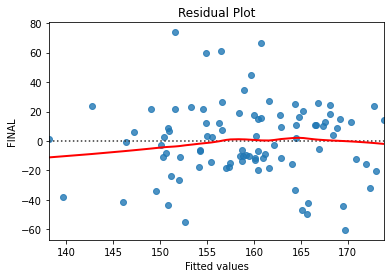

In [157]:
### Grafico de residuos frente a los valores ajustados
sns.residplot(predictiones.reshape(-1), 'FINAL', data=df_umbral_4, lowess=True, 
             line_kws={'color':'red','lw':2, 'alpha':1})
plt.xlabel('Fitted values')
plt.title('Residual Plot')

In [159]:
### Grafico QQ 
## Este gráfico muestra si los residuos (errores) se distribuyen normalmente o no. 
## Si los puntos se encuentran cerca de la línea normal (Diagonal), 
## se supone que los residuos se distribuyen normalmente.

residuales = df_umbral_4['FINAL'] - predictiones.reshape(-1)
residuales

0      -9.170152
1      19.759904
2      12.419051
3      23.187160
4      -8.635163
         ...    
98     -5.909179
99      8.214731
100     6.110371
101   -12.908453
102    44.293044
Name: FINAL, Length: 94, dtype: float64

Text(0.5, 1.0, 'Normal Q-Q Plot')

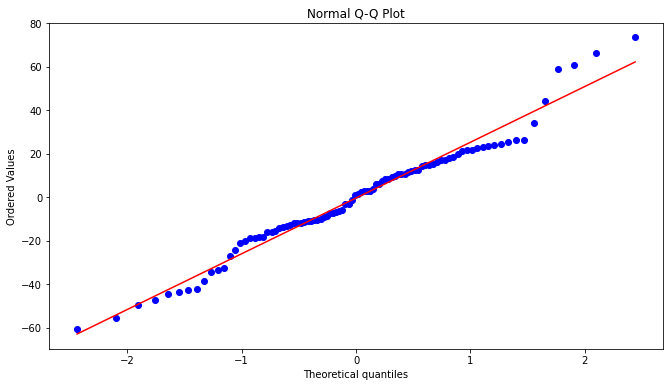

In [160]:
plt.figure(figsize=(11,6))
stats.probplot(residuales, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")